<a href="https://colab.research.google.com/github/naveen959/Goeduhub/blob/main/Task_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task - 16**
**Name - T. Naveen**

**Reg no - GO_STP_13234**

**Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.**

**Create a Model using Naive Bayes classifiers to predict whether a passenger on the titanic would have been survived or not.**

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('titanic_train.csv')
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [81]:
df.drop(['passenger_id','name','ticket'],axis=1,inplace=True)
df.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest,survived
0,3,female,NaN,0,0,7.7333,NaN,Q,13,NaN,NaN,1
1,3,male,38.0,0,0,8.6625,NaN,S,NaN,NaN,Croatia,0
2,3,female,30.0,1,1,24.1500,NaN,S,NaN,NaN,NaN,0
3,2,female,54.0,1,3,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,2,male,40.0,0,0,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [82]:
df.shape

(850, 12)

In [83]:
df.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked',
       'boat', 'body', 'home.dest', 'survived'],
      dtype='object')

In [84]:
df.dtypes

pclass         int64
sex           object
age          float64
sibsp          int64
parch          int64
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
survived       int64
dtype: object

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     850 non-null    int64  
 1   sex        850 non-null    object 
 2   age        676 non-null    float64
 3   sibsp      850 non-null    int64  
 4   parch      850 non-null    int64  
 5   fare       849 non-null    float64
 6   cabin      191 non-null    object 
 7   embarked   849 non-null    object 
 8   boat       308 non-null    object 
 9   body       73 non-null     float64
 10  home.dest  464 non-null    object 
 11  survived   850 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 79.8+ KB


**Checking missing values**

In [86]:
df.isna().sum()

pclass         0
sex            0
age          174
sibsp          0
parch          0
fare           1
cabin        659
embarked       1
boat         542
body         777
home.dest    386
survived       0
dtype: int64

In [87]:
df['age'].fillna(df.age.median(),inplace=True)
df.age.isna().any()

False

In [88]:
np.random.seed(40)
df['cabin'].fillna(np.random.choice(df.cabin.unique()),inplace=True)
df.cabin.isna().any()

False

In [89]:
df.drop(['boat'],axis=1,inplace=True)
df.drop(['body'],axis=1,inplace=True)
df.drop(['home.dest'],axis=1,inplace=True)
df.drop(['fare'],axis=1,inplace=True)

In [90]:
df.isna().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
cabin       0
embarked    1
survived    0
dtype: int64

**Value counts**

In [91]:
Survived = df.groupby('survived')['survived'].count()
Survived

survived
0    537
1    313
Name: survived, dtype: int64

In [92]:
df.sex.value_counts()

male      551
female    299
Name: sex, dtype: int64

In [93]:
df.embarked.value_counts()

S    589
C    176
Q     84
Name: embarked, dtype: int64

In [94]:
df.pclass.value_counts()

3    478
1    206
2    166
Name: pclass, dtype: int64

In [95]:
df['cabin']=df.cabin.astype(str)
df['cabin']=df.cabin.str.get(0)
df.cabin.value_counts()

A    671
C     62
B     45
D     31
E     24
F     12
G      4
T      1
Name: cabin, dtype: int64

In [96]:
df.describe()

,pclass,age,sibsp,parch,survived
count,850.00000,850.000000,850.000000,850.000000,850.000000
mean,2.32000,29.208726,0.522353,0.382353,0.368235
std,0.83853,12.999023,1.112132,0.879511,0.482610
min,1.00000,0.166700,0.000000,0.000000,0.000000
25%,2.00000,22.000000,0.000000,0.000000,0.000000
50%,3.00000,28.000000,0.000000,0.000000,0.000000
75%,3.00000,34.875000,1.000000,0.000000,1.000000
max,3.00000,80.000000,8.000000,9.000000,1.000000


In [97]:
df["FamilySize"] = df["sibsp"] + df["parch"]
df.head()

,pclass,sex,age,sibsp,parch,cabin,embarked,survived,FamilySize
0,3,female,28.0,0,0,A,Q,1,0
1,3,male,38.0,0,0,A,S,0,0
2,3,female,30.0,1,1,A,S,0,2
3,2,female,54.0,1,3,A,S,1,4
4,2,male,40.0,0,0,A,S,0,0


In [98]:
df.drop(['sibsp','parch'],axis=1,inplace=True)
df.head()

,pclass,sex,age,cabin,embarked,survived,FamilySize
0,3,female,28.0,A,Q,1,0
1,3,male,38.0,A,S,0,0
2,3,female,30.0,A,S,0,2
3,2,female,54.0,A,S,1,4
4,2,male,40.0,A,S,0,0


In [99]:
df["alone"] = [0 if df["FamilySize"][i] > 0 else 1 for i in df.index]
df.head()

,pclass,sex,age,cabin,embarked,survived,FamilySize,alone
0,3,female,28.0,A,Q,1,0,1
1,3,male,38.0,A,S,0,0,1
2,3,female,30.0,A,S,0,2,0
3,2,female,54.0,A,S,1,4,0
4,2,male,40.0,A,S,0,0,1


**Data visualisation**

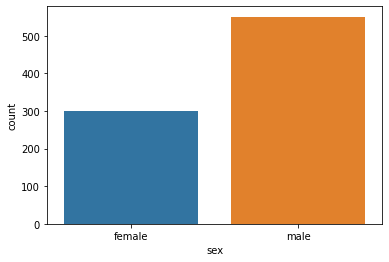

In [100]:
sns.countplot(x='sex',data=df);

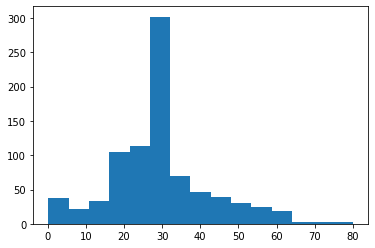

In [101]:
plt.hist(x = df["age"],bins=15);

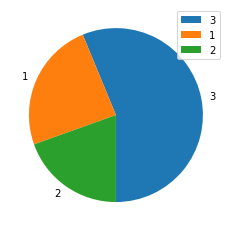

In [102]:
x = df["pclass"].value_counts()
plt.pie(x, labels = x.index, startangle = 270);
plt.legend()

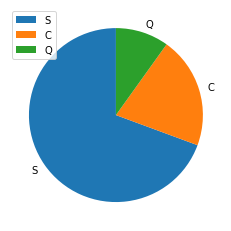

In [103]:
y = df["embarked"].value_counts()
plt.pie(y, labels = y.index, startangle = 90, counterclock = True);
plt.legend()

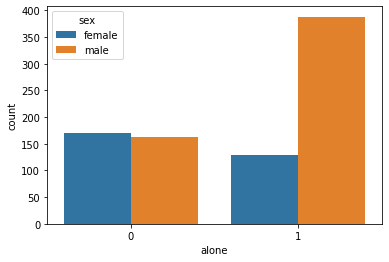

In [104]:
sns.countplot(x = "alone", hue = "sex", data = df);

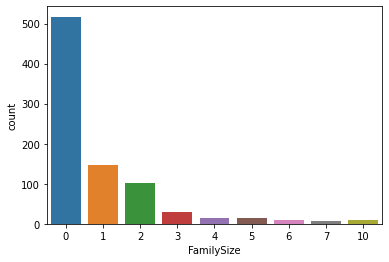

In [105]:
sns.countplot(x = "FamilySize", data = df);

In [106]:
ages = df[df['age'].notnull()]['age'].values
ages_hist = np.histogram(ages, bins=[0,10,20,30,40,50,60,70,80,90])
ages_hist

(array([ 56,  99, 394, 152,  72,  52,  20,   4,   1]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]))

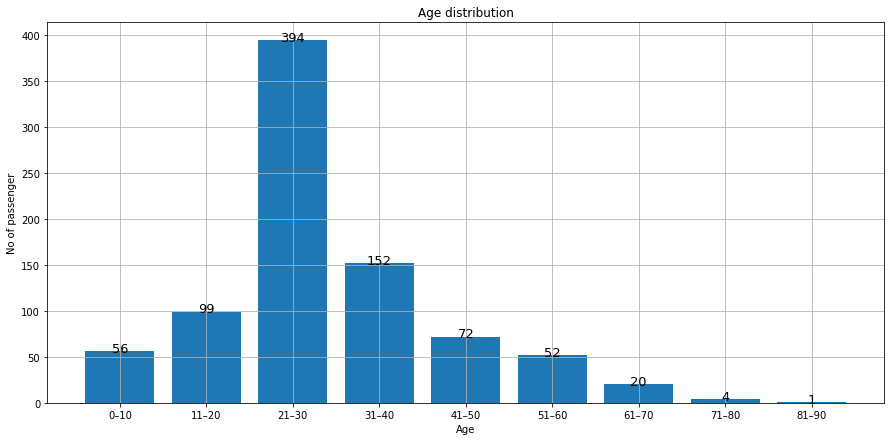

In [107]:
ages_hist_labels = ['0–10', '11–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81–90']
plt.figure(figsize=(15,7))
plt.title('Age distribution')
plt.bar(ages_hist_labels, ages_hist[0])
plt.xlabel('Age')
plt.ylabel('No of passenger')
for i, bin in zip(ages_hist[0], range(9)):
    plt.text(bin, i+3, str(int(i)), fontsize=13,
    horizontalalignment='center', verticalalignment='center')
plt.grid()
plt.show()

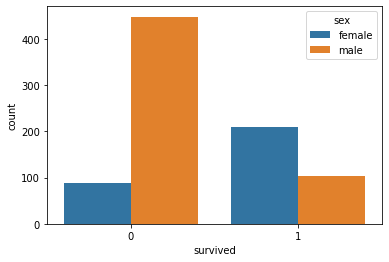

In [108]:
sns.countplot(x = "survived", hue = "sex", data = df);

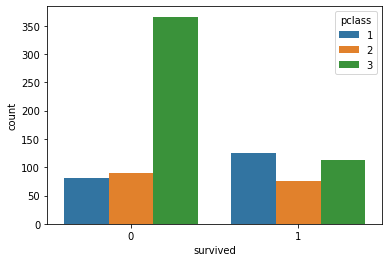

In [109]:
sns.countplot(x = "survived", hue = "pclass", data = df);

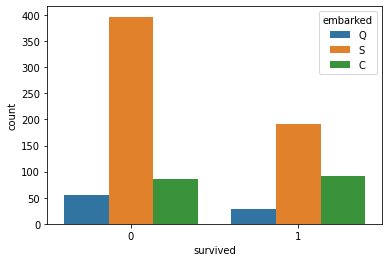

In [110]:
sns.countplot(x = "survived", hue = "embarked", data = df);

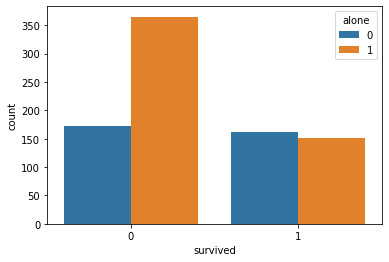

In [111]:
sns.countplot(x = "survived", hue = "alone", data = df);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


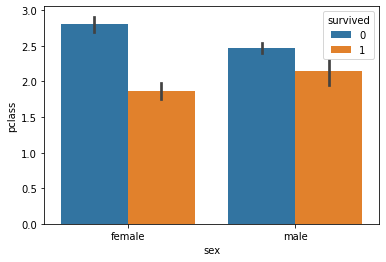

In [112]:
sns.barplot("sex", "pclass", hue = "survived", data = df);

**Label Encoding**

In [113]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df.sex=label_encoder.fit_transform(df.sex)
df.sex.unique()

array([0, 1])

In [114]:
df.embarked=label_encoder.fit_transform(df.embarked.astype(str))
df.embarked.unique()

array([1, 2, 0, 3])

In [115]:
df.head()

,pclass,sex,age,cabin,embarked,survived,FamilySize,alone
0,3,0,28.0,A,1,1,0,1
1,3,1,38.0,A,2,0,0,1
2,3,0,30.0,A,2,0,2,0
3,2,0,54.0,A,2,1,4,0
4,2,1,40.0,A,2,0,0,1


**Dividing the data for training and testing**

In [116]:
features = df[["pclass", "sex", "age", "embarked", "FamilySize", "alone"]]
target = df["survived"]

In [117]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 7)
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (595, 6)
Shape of y_train: (595,)
Shape of x_test: (255, 6)
Shape of y_test: (255,)


**Creating Naive Bayes model**

In [118]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [119]:
y_pred = gnb.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [120]:
acc_gaussian = round(gnb.score(x_train, y_train) * 100, 2)
acc_gaussian

77.31

**Confusion matrix and accuracy**

In [121]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm=confusion_matrix(y_test,y_pred)
cm

array([[129,  30],
       [ 28,  68]])

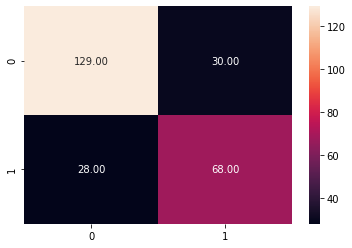

In [122]:
sns.heatmap(cm,annot=True,fmt='.2f');

In [123]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7725490196078432